In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-pedometer-data/WalkTheDogs.csv


### Data Preparation

In [14]:
df = pd.read_csv("/kaggle/input/daily-pedometer-data/WalkTheDogs.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  223 non-null    int64  
 1   StepCount   223 non-null    int64  
 2   Kcal        223 non-null    int64  
 3   Miles       223 non-null    float64
 4   Weather     223 non-null    object 
 5   Day         223 non-null    object 
 6   Walk        223 non-null    int64  
 7   Steps       223 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 14.1+ KB


In [16]:
##dropping the unnecessary column

df = df.drop('Unnamed: 0',axis = 1)
df.columns

Index(['StepCount', 'Kcal', 'Miles', 'Weather', 'Day', 'Walk', 'Steps'], dtype='object')

In [17]:
## replacing the value for days to full names.

df["Day"] = df["Day"].replace({
    "S":"Saturday",
    "F":"Friday",
    "M":"Monday",
    "R":"Thursday",
    "T":"Tuesday",
    "U":"Sunday",
    "W":"Wednesday"
})

df.head(5)

,StepCount,Kcal,Miles,Weather,Day,Walk,Steps
0,2615,8,1.4,shine,Friday,0,2.615
1,3323,12,1.8,shine,Saturday,0,3.323
2,2721,13,1.4,shine,Sunday,0,2.721
3,2454,12,1.3,shine,Monday,0,2.454
4,5528,152,3.1,cold,Tuesday,1,5.528


In [18]:
## Revise the "Walk" column.

df = df.rename(columns={"Walk":"DogWalked"})
df["Dog Walked"] = df["DogWalked"].astype(str)
df["Dog Walked"] = df["DogWalked"].replace({"1":"True","0":"False"})
df.head(5)

,StepCount,Kcal,Miles,Weather,Day,DogWalked,Steps,Dog Walked
0,2615,8,1.4,shine,Friday,0,2.615,0
1,3323,12,1.8,shine,Saturday,0,3.323,0
2,2721,13,1.4,shine,Sunday,0,2.721,0
3,2454,12,1.3,shine,Monday,0,2.454,0
4,5528,152,3.1,cold,Tuesday,1,5.528,1


In [19]:
## revise the weather column

df["Weather"] = df["Weather"].replace({"shine":"Clear","cold":"Cold","rain":"Rain"})
df.head(5)

,StepCount,Kcal,Miles,Weather,Day,DogWalked,Steps,Dog Walked
0,2615,8,1.4,Clear,Friday,0,2.615,0
1,3323,12,1.8,Clear,Saturday,0,3.323,0
2,2721,13,1.4,Clear,Sunday,0,2.721,0
3,2454,12,1.3,Clear,Monday,0,2.454,0
4,5528,152,3.1,Cold,Tuesday,1,5.528,1


In [20]:
## Add another column converting miles to kilometers.

df["Kilometer"] = df["Miles"].apply(lambda x : round(x * 1.609,2))
df.head(5)

,StepCount,Kcal,Miles,Weather,Day,DogWalked,Steps,Dog Walked,Kilometer
0,2615,8,1.4,Clear,Friday,0,2.615,0,2.25
1,3323,12,1.8,Clear,Saturday,0,3.323,0,2.90
2,2721,13,1.4,Clear,Sunday,0,2.721,0,2.25
3,2454,12,1.3,Clear,Monday,0,2.454,0,2.09
4,5528,152,3.1,Cold,Tuesday,1,5.528,1,4.99


In [21]:
## Reorder the columns

df = df[["StepCount","Kcal","Kilometer","Miles","Weather","Day","Dog Walked"]]
df.head(1)

,StepCount,Kcal,Kilometer,Miles,Weather,Day,Dog Walked
0,2615,8,2.25,1.4,Clear,Friday,0


## Data Analysis

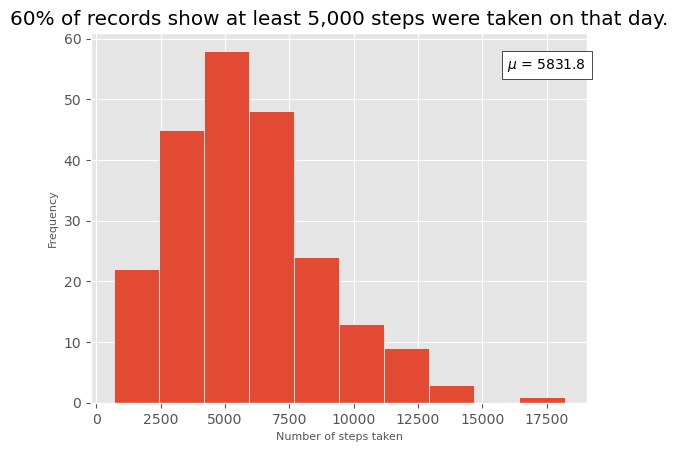

In [22]:
## Counting the number of steps in a histogram.

plt.style.use("ggplot")

data = df["StepCount"]
fig, ax = plt.subplots()

ax.hist(data,edgecolor="white")
ax.set_title("60% of records show at least 5,000 steps were taken on that day.")
ax.text(17500,55,f'$\mu$ = {round(df["StepCount"].mean(),2)}',ha="center",
        bbox={"facecolor":"white","edgecolor":"black"})
ax.set_xlabel("Number of steps taken",fontsize=8)
ax.set_ylabel("Frequency",fontsize=8)

plt.show()

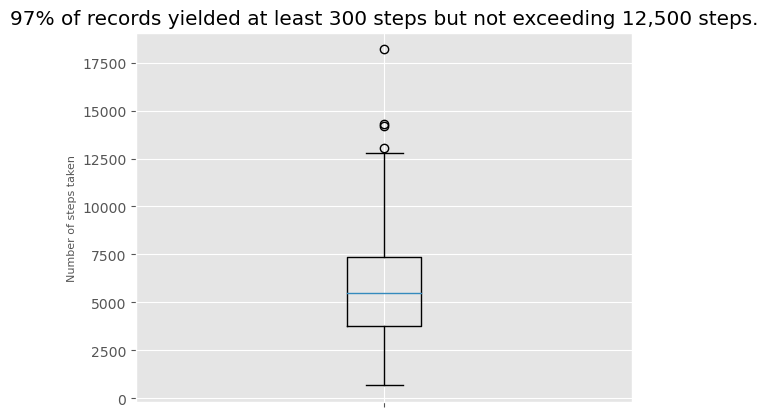

In [23]:
## Number of steps in boxplot.

plt.style.use("ggplot")

data = df["StepCount"]
fig, ax = plt.subplots()

ax.boxplot(df["StepCount"],labels=[""])
ax.set_title("97% of records yielded at least 300 steps but not exceeding 12,500 steps.")
ax.set_ylabel("Number of steps taken",fontsize=8)

plt.show()

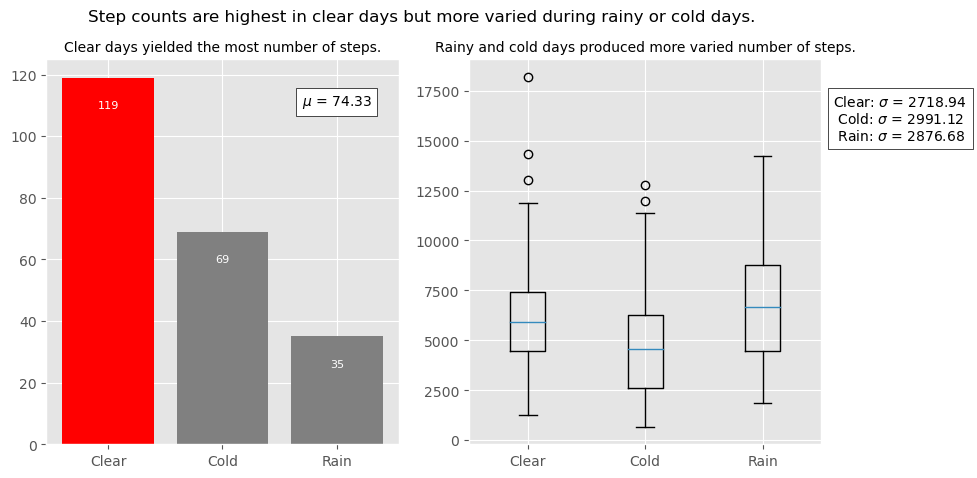

In [25]:
## Number of steps according to weather conditions.

data = df[["StepCount","Weather"]]

fig,(ax,ax1) = plt.subplots(1,2,figsize=(10,5))

## Plotting mean number of steps.

data = data.groupby("Weather").agg("count").reset_index()
data_x = data["Weather"]
data_y = data["StepCount"]

maxval = data["StepCount"].max()

ax.bar(data_x,data_y,color=["red" if value == maxval else "gray" for value in data["StepCount"]])



for i,v in enumerate(data["StepCount"]):
    ax.text(i,v-10,str(v),fontsize=8,color="white",ha="center")
    
ax.text(2,110,f'$\mu$ = {round(data["StepCount"].mean(),2)}',ha="center",bbox={"facecolor":"white","edgecolor":"black"})
ax.set_title("Clear days yielded the most number of steps.",fontsize=10)

## box plots for each of the days.

data = df[["StepCount","Weather"]]
data_clear = data.loc[data["Weather"] == "Clear"].reset_index()["StepCount"]
data_cold = data.loc[data["Weather"] == "Cold"].reset_index()["StepCount"]
data_rain = data.loc[data["Weather"] == "Rain"].reset_index()["StepCount"]

ax1.boxplot([data_clear,data_cold,data_rain],labels=["Clear","Cold","Rain"])
ax1.set_title("Rainy and cold days produced more varied number of steps.",fontsize=10)
ax1.text(3.6,15000,
         f'Clear: $\sigma$ = {round(data_clear.std(),2)} \n Cold: $\sigma$ = {round(data_cold.std(),2)} \n Rain: $\sigma$ = {round(data_rain.std(),2)}'
         ,bbox={"facecolor":"white","edgecolor":"black"})

fig.suptitle("Step counts are highest in clear days but more varied during rainy or cold days.",fontsize=12)
plt.show()

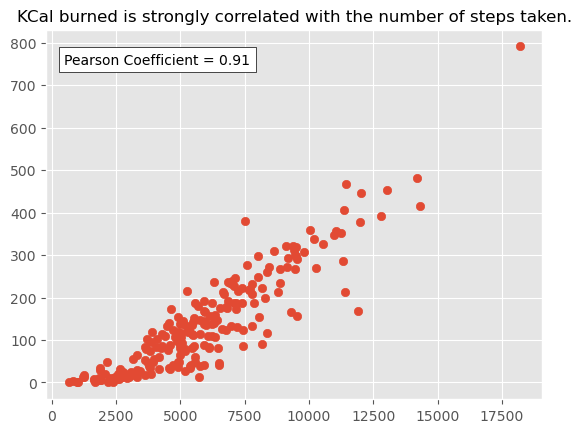

In [26]:
## relationship between kcal and stepcount

plt.style.use("ggplot")

fig, ax = plt.subplots()

data = df[["StepCount","Kcal"]]

ax.scatter(data["StepCount"],data["Kcal"])

corr = round(data["StepCount"].corr(data["Kcal"]),2)

ax.text(500,750,f'Pearson Coefficient = {corr}',fontsize=10,bbox={"facecolor":"white","edgecolor":"black"})

ax.set_title("KCal burned is strongly correlated with the number of steps taken.",fontsize=12)
plt.show()

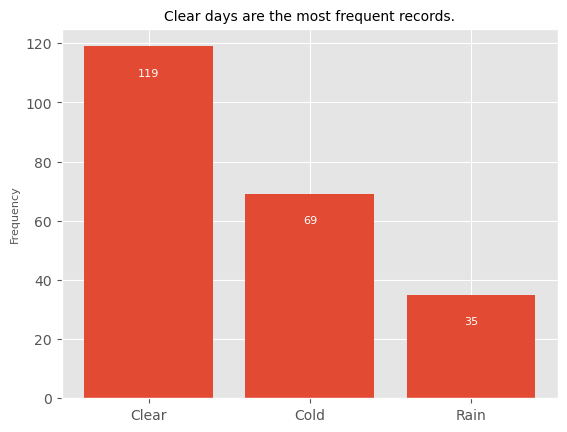

In [40]:
## distribution of records per weather.

plt.style.use("ggplot")

data = df.groupby("Weather").agg("count").reset_index()
data_x = data["Weather"]
data_y = data["StepCount"]

fig, ax = plt.subplots()
ax.bar(data_x,data_y)
ax.set_ylabel("Frequency",fontsize=8)
ax.set_title("Clear days are the most frequent records.",fontsize=10)

for i,v, in enumerate(data["StepCount"]):
    ax.text(i,v-10,str(v),ha="center",fontsize=8,color="white")

plt.show()

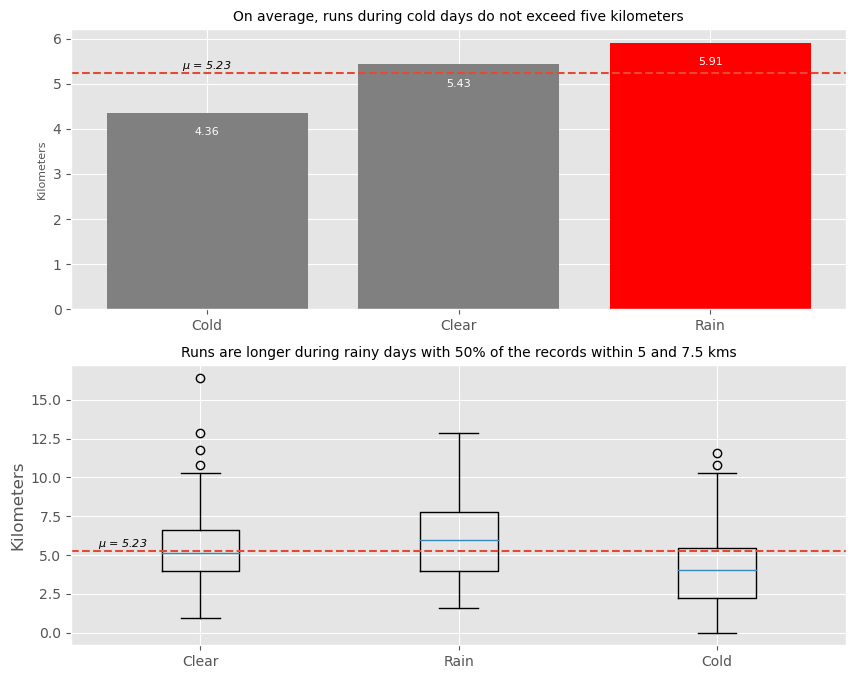

In [95]:
## Averaging kilometers ran.

plt.style.use("ggplot")

fig , (ax, ax1) = plt.subplots(2,1,figsize=(10,8))

## Averages of kilometers per weather.

data = df[["Weather","Kilometer"]].groupby("Weather").agg("mean").reset_index()
data["Kilometer"] = data["Kilometer"].apply(lambda x : round(x,2)).to_frame()
data = data.sort_values(by="Kilometer",ascending=True)

data_x = data["Weather"]
data_y = data["Kilometer"]

maxval = data_y.max()

ax.bar(data_x,data_y,color=["red" if value == maxval else "gray" for value in data["Kilometer"]])
for i,v in enumerate(data_y):
    ax.text(i,v-0.5,str(v),ha="center",fontsize=8,color="white")
ax.set_ylabel("Kilometers",fontsize=8)
ax.set_title("On average, runs during cold days do not exceed five kilometers",fontsize=10)
ax.axhline(data_y.mean(),linestyle="--")
ax.text(0,data_y.mean()+0.1,f'$\mu$ = {str(round(data_y.mean(),2))}',fontsize=8,style="italic",ha="center")

## Boxplotting the kilometers ran.

data_clear = df.loc[df["Weather"] == "Clear"]["Kilometer"]
data_rain = df.loc[df["Weather"] == "Rain"]["Kilometer"]
data_cold = df.loc[df["Weather"] == "Cold"]["Kilometer"]

ax1.boxplot([data_clear,data_rain,data_cold],labels=["Clear","Rain","Cold"])
ax1.set_ylabel("Kilometers")
ax1.axhline(data_y.mean(),linestyle="--")
ax1.text(0.7,data_y.mean()+0.3,f'$\mu$ = {str(round(data_y.mean(),2))}',fontsize=8,style="italic",ha="center")
ax1.set_title("Runs are longer during rainy days with 50% of the records within 5 and 7.5 kms",fontsize=10)

plt.show()

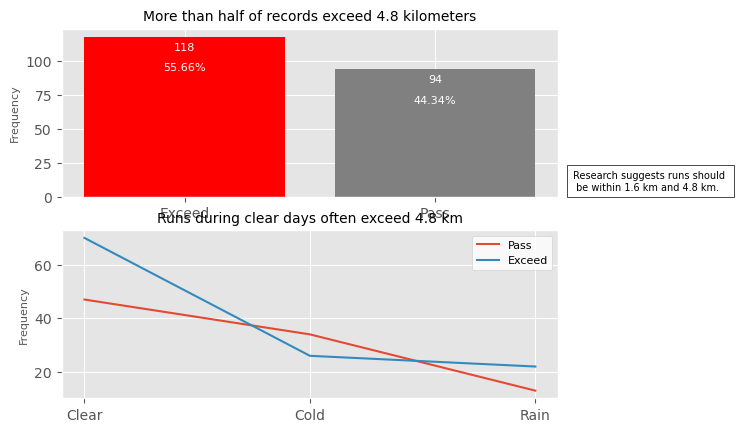

In [148]:
## Counting kilometers more than 1.6

data = df.loc[df["Kilometer"] >= 1.6]
data = data.copy()
data.loc[:,"KmStatus"] = np.where(data["Kilometer"] >= 4.8,"Exceed",np.where(data["Kilometer"] >= 1.6,"Pass","Fail"))

fig, (ax,ax1) = plt.subplots(2,1)

## Counting how many runs were within range.
data = data.groupby("KmStatus").agg("count").reset_index()
data_x = data["KmStatus"]
data_y = data["StepCount"]

ax.bar(data_x,data_y,color=["red" if status == "Exceed" else "gray" for status in data_x])
for i,v, in enumerate(data_y):
    ax.text(i,v-10,str(v),ha="center",color="white",fontsize=8)
    ax.text(i,v-25,str(round((v/data_y.sum())*100,2))+"%",ha="center",color="white",fontsize=8)
ax.set_title("More than half of records exceed 4.8 kilometers",fontsize=10)
ax.text(1.55,5,"Research suggests runs should \n be within 1.6 km and 4.8 km.",ha="left",fontsize=7,bbox={"facecolor":"white","edgecolor":"black"})
ax.set_ylabel("Frequency",fontsize=8)

## counting the number of "pass" per weather.

data = df.loc[df["Kilometer"] >= 1.6]
data = data.copy()
data.loc[:,"KmStatus"] = np.where(data["Kilometer"] >= 4.8,"Exceed",np.where(data["Kilometer"] >= 1.6,"Pass","Fail"))
data = data.loc[data["KmStatus"] == "Pass"]
data = data.groupby("Weather").agg("count").reset_index()

data_x = data["Weather"]
data_y = data["StepCount"]

ax1.plot(data_x,data_y,label="Pass")

data = df.loc[df["Kilometer"] >= 1.6]
data = data.copy()
data.loc[:,"KmStatus"] = np.where(data["Kilometer"] >= 4.8,"Exceed",np.where(data["Kilometer"] >= 1.6,"Pass","Fail"))
data = data.loc[data["KmStatus"] == "Exceed"]
data = data.groupby("Weather").agg("count").reset_index()

data_x = data["Weather"]
data_y = data["StepCount"]

ax1.plot(data_x,data_y,label="Exceed")
ax1.legend(fontsize=8,facecolor="white",frameon=True)
ax1.set_ylabel("Frequency",fontsize=8)
ax1.set_title("Runs during clear days often exceed 4.8 km",fontsize=10)

plt.show()
